In [1]:
#pip install matplotlib

In [2]:
import matplotlib
matplotlib.__version__

'3.5.0'

In [3]:
#Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Creating a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
#Practicing zipping a small number of latitudes and longitudes adn then unpacking the zipped tuple too see how the packing and unpacking work.
#please see API_Practice.ipynb file for more. 

In [6]:
#Only need to create a set of random lats and longs once. We add the following ode:
coordinates = list(lat_lngs)

In [7]:
#Note: You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.


In [8]:
#With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

In [9]:
#Since we haven't worked with the citipy module yet, let's import and test it. Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [10]:
#pip install citipy
#citipy.__version__

In [11]:
#Importing citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
#USe the tuple() function to display the lat and longs combination for coordinates variable.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bredasdorp za
butaritari ki
tsienyane bw
nikolskoye ru
bluff nz
kinablangan ph
lorengau pg
bengkulu id
massillon us
provideniya ru
chabahar ir
tucumcari us
crotone it
rikitea pf
husavik is
provideniya ru
inongo cd
ewa beach us
ocampo mx
tubuala pa
saskylakh ru
ushuaia ar
uwayl sd
tuatapere nz
waddan ly
illoqqortoormiut gl
tasiilaq gl
chokurdakh ru
hobart au
esperance au
iqaluit ca
nome us
avarua ck
dikson ru
immenstadt de
alexandria us
roma au
dali cn
hobart au
cabo san lucas mx
busselton au
provideniya ru
grindavik is
norrtalje se
ostrovnoy ru
arraial do cabo br
cape town za
samarai pg
tupik ru
cape town za
milkovo ru
monterey us
jamestown sh
rikitea pf
bahia blanca ar
huicheng cn
turukhansk ru
atuona pf
castro cl
yellowknife ca
rikitea pf
ponta do sol cv
maun bw
taolanaro mg
davila ph
vaini to
hilo us
port lincoln au
atuona pf
atuona pf
avera pf
codrington ag
smithers ca
ancud cl
hobart au
rikitea pf
bonthe sl
toora-khem ru
smirnykh ru
norman wells ca
puerto narino co
ushuaia ar
para

hermanus za
hihifo to
laguna br
tuktoyaktuk ca
dunda tz
chokurdakh ru
punta arenas cl
santa maria cv
homestead us
taolanaro mg
ribeira grande pt
ushuaia ar
kibaya tz
salalah om
kracheh kh
trofors no
albany au
venado tuerto ar
rikitea pf
jacareacanga br
banov cz
busselton au
bijawar in
upernavik gl
bilma ne
taunggyi mm
ushuaia ar
luderitz na
qaanaaq gl
ushuaia ar
pevek ru
lautaro cl
half moon bay us
punta arenas cl
port alfred za
te horo nz
karoi zw
busselton au
kapaa us
chor pk
hilo us
hermanus za
maceio br
pandan ph
skjervoy no
waddan ly
mount gambier au
taber ca
ushuaia ar
brikama gm
punta arenas cl
rikitea pf
sola vu
saleaula ws
porto novo cv
upernavik gl
hithadhoo mv
andenes no
tromso no
hamilton bm
richards bay za
airai pw
tambo pe
laguna br
jamestown sh
saldanha za
new norfolk au
pangkalanbuun id
carnarvon au
shirokiy ru
teofilo otoni br
iqaluit ca
bluff nz
honningsvag no
ribeira grande pt
chokurdakh ru
nikolskoye ru
castro cl
ushuaia ar
seydi tm
lorengau pg
amderma ru
avarua ck


In [13]:
#Creating a list for holding the cities.
cities = []
#Identify the nearest city for each lat and longs combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is uniqe, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
    
len(cities)

631

In [14]:
#importing the requests library
import requests

#Importing the API Key
from config import weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c73b5f585264c5bbe7362d01d1c06eee


In [17]:
#Creating an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Creating counters.
record_count = 1
set_count = 1
#In this code block, we have initalized the counters at 1 because we want the first iteration
#of the logging for each recorded response and the set
#to start at 1.

#Looping through all the cities in my list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#Every time we want to reference the city in our code, we need to use the indexing on the cities list. 
#Unfortunately, this will cause programming errors when we are building the city_url because it adds 
#the index, not the city name, to the city_url. To fix this issue, we need to create another 
#for loop to get the city from the cities list.
#Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate 
#through the list of cities and retrieve both the index, and the city from the list.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | kinablangan
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | massillon
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | chabahar
Processing Record 12 of Set 1 | tucumcari
Processing Record 13 of Set 1 | crotone
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | inongo
Processing Record 17 of Set 1 | ewa beach
Processing Record 18 of Set 1 | ocampo
Processing Record 19 of Set 1 | tubuala
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | uwayl
City not found. S

Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | urumqi
Processing Record 41 of Set 4 | kongolo
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | kununurra
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | kiunga
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | saraland
Processing Record 48 of Set 4 | arkhangelskoye
Processing Record 49 of Set 4 | harlingen
Processing Record 50 of Set 4 | maragogi
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | mehamn
Processing Record 3 of Set 5 | wahran
City not found. Skipping...
Processing Record 4 of Set 5 | myitkyina
Processing Record 5 of Set 5 | sataua
City not found. Skipping...
Processing Record 6 of Set 5 | mangan
Processing Record 7 of Set 5 | bandraboua
Processing Record 8 of Set 5 | inhapim
Processing Record 9 of Set 5 | sandpoint
Processing Record 10 of Set 5 | nola
Processing Record 11 of Set 5 | tual
Processing Record

Processing Record 27 of Set 8 | inirida
Processing Record 28 of Set 8 | oranjemund
Processing Record 29 of Set 8 | rungata
City not found. Skipping...
Processing Record 30 of Set 8 | viligili
City not found. Skipping...
Processing Record 31 of Set 8 | barranca
Processing Record 32 of Set 8 | akdepe
Processing Record 33 of Set 8 | port-gentil
Processing Record 34 of Set 8 | gurlan
Processing Record 35 of Set 8 | gasa
Processing Record 36 of Set 8 | ballina
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 39 of Set 8 | ko samui
Processing Record 40 of Set 8 | ust-kalmanka
Processing Record 41 of Set 8 | nicoya
Processing Record 42 of Set 8 | huilong
Processing Record 43 of Set 8 | beasain
Processing Record 44 of Set 8 | healesville
Processing Record 45 of Set 8 | khairpur nathan shah
Processing Record 46 of Set 8 | plettenberg bay
Processing Record 47 of Set 8 | chapais
Processing Record 48 of Set 8 | 

Processing Record 13 of Set 12 | mahajanga
Processing Record 14 of Set 12 | lanzhou
Processing Record 15 of Set 12 | meulaboh
Processing Record 16 of Set 12 | bontang
Processing Record 17 of Set 12 | cabedelo
Processing Record 18 of Set 12 | victoria
Processing Record 19 of Set 12 | sortavala
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | natchitoches
Processing Record 22 of Set 12 | burnie
Processing Record 23 of Set 12 | kaduna
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | banjar
Processing Record 26 of Set 12 | shubarkuduk
Processing Record 27 of Set 12 | skibbereen
Processing Record 28 of Set 12 | natal
Processing Record 29 of Set 12 | mulege
Processing Record 30 of Set 12 | mizdah
Processing Record 31 of Set 12 | aasiaat
Processing Record 32 of Set 12 | coihaique
Processing Record 33 of Set 12 | ixtapa
Processing Record 34 of Set 12 | iquitos
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | haapiti
Proces

In [18]:
#Next, we will retrieve the data from the JSON weather response for each city.

In [19]:
#When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse.
#If not, the script might stop at that moment and not finish getting all the data we need.


In [20]:
#Handle API Request Errors with try-except Blocks

In [21]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,65.28,89,99,12.55,ZA,2021-12-08 20:10:22
1,Butaritari,3.0707,172.7902,82.40,77,99,12.86,KI,2021-12-08 20:10:22
2,Nikolskoye,59.7035,30.7861,10.29,100,97,2.68,RU,2021-12-08 20:10:22
3,Bluff,-46.6000,168.3333,52.81,87,100,4.14,NZ,2021-12-08 20:10:23
4,Kinablangan,7.6947,126.5503,76.66,80,100,5.95,PH,2021-12-08 20:10:23
5,Lorengau,-2.0226,147.2712,80.17,84,100,17.29,PG,2021-12-08 20:10:23
6,Bengkulu,-3.8004,102.2655,74.95,91,54,4.54,ID,2021-12-08 20:10:24
7,Massillon,40.7967,-81.5215,31.01,64,90,5.01,US,2021-12-08 20:10:24
8,Provideniya,64.3833,-173.3000,6.91,78,90,24.61,RU,2021-12-08 20:10:25
9,Chabahar,25.2919,60.6430,72.28,59,59,2.89,IR,2021-12-08 20:10:26


In [22]:
#Reordering columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-12-08 20:10:22,-34.5322,20.0403,65.28,89,99,12.55
1,Butaritari,KI,2021-12-08 20:10:22,3.0707,172.7902,82.40,77,99,12.86
2,Nikolskoye,RU,2021-12-08 20:10:22,59.7035,30.7861,10.29,100,97,2.68
3,Bluff,NZ,2021-12-08 20:10:23,-46.6000,168.3333,52.81,87,100,4.14
4,Kinablangan,PH,2021-12-08 20:10:23,7.6947,126.5503,76.66,80,100,5.95
5,Lorengau,PG,2021-12-08 20:10:23,-2.0226,147.2712,80.17,84,100,17.29
6,Bengkulu,ID,2021-12-08 20:10:24,-3.8004,102.2655,74.95,91,54,4.54
7,Massillon,US,2021-12-08 20:10:24,40.7967,-81.5215,31.01,64,90,5.01
8,Provideniya,RU,2021-12-08 20:10:25,64.3833,-173.3000,6.91,78,90,24.61
9,Chabahar,IR,2021-12-08 20:10:26,25.2919,60.6430,72.28,59,59,2.89


In [23]:
#Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"
#Export the CIty_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
#Extractting relevant fields from the DAtaFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

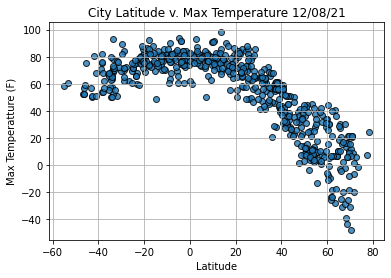

In [28]:
#Importing the time module
import time

#Build the scatter plot for lattitude v. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude v. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperatture (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

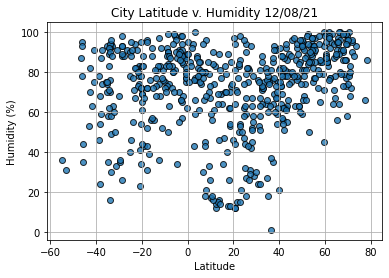

In [30]:
#Building the scatter plots for latitude v. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude v. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure for lat v. humidity.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()


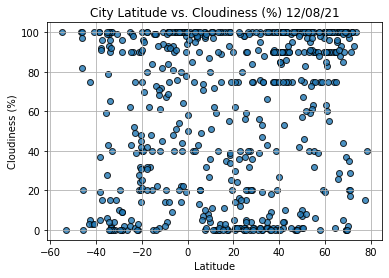

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

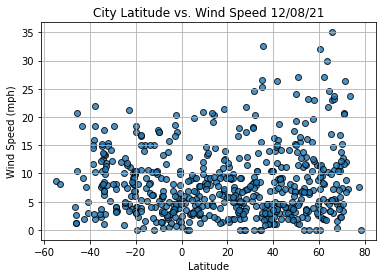

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on eather data
#and plot a regression line adn the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label,text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Create a scatter plot and plot the regressin line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
#Creating the Hemisphere DataFrames

In [35]:
#Adding code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.
#To do this, we will need to create Northern Hemipshere DataFrames from the city_data_df DataFrame.


In [37]:
#Creating northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-12-08 20:10:22,3.0707,172.7902,82.40,77,99,12.86
2,Nikolskoye,RU,2021-12-08 20:10:22,59.7035,30.7861,10.29,100,97,2.68
4,Kinablangan,PH,2021-12-08 20:10:23,7.6947,126.5503,76.66,80,100,5.95
7,Massillon,US,2021-12-08 20:10:24,40.7967,-81.5215,31.01,64,90,5.01
8,Provideniya,RU,2021-12-08 20:10:25,64.3833,-173.3000,6.91,78,90,24.61


In [38]:
#Creating Southern Hemmisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-12-08 20:10:22,-34.5322,20.0403,65.28,89,99,12.55
3,Bluff,NZ,2021-12-08 20:10:23,-46.6000,168.3333,52.81,87,100,4.14
5,Lorengau,PG,2021-12-08 20:10:23,-2.0226,147.2712,80.17,84,100,17.29
6,Bengkulu,ID,2021-12-08 20:10:24,-3.8004,102.2655,74.95,91,54,4.54
12,Rikitea,PF,2021-12-08 20:10:27,-23.1203,-134.9692,75.69,67,49,21.23


In [39]:
#Now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.

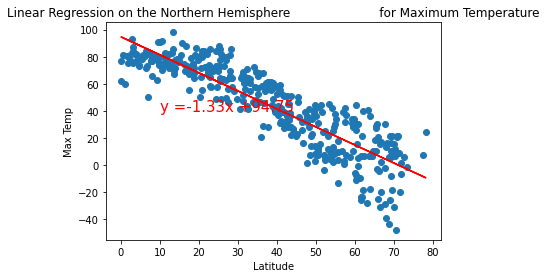

In [55]:
#Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\
                       for Maximum Temperature", "Max Temp", (10,40))

In [41]:
#Analysis: because it is the northern hemisphere, the further
#north we go (that is the greater the latitude), the lower the tetmperatur
#since it is currently winter.


In [42]:
#Performing LInear Regression on Max Temp for Southern Hemisphere.

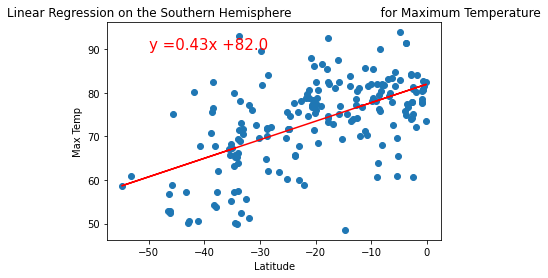

In [54]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature", "Max Temp", (-50,90))

In [48]:
#Analysis: this time, we see a positive relationship between latitude and and ttemperatture, meaning
#as we go further north in the souther n hemisphere that temperatures will begin to rise. 
#His is fo course during hte winter time.


In [56]:
#Finding tthe Correlation BEtween Latitude and Percent Humididty.

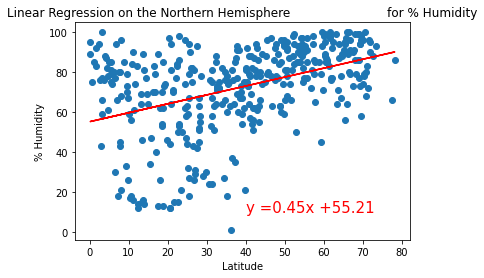

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [60]:
#Look at this, tthere is somewhat of a relationship between humidity 
#and going further north within the nrothern hemisphere during the winter
#time. Might be more true now as tempteratures are warmer due to 
#global warming. 

In [62]:
r_humidity_north = np.corrcoef(x_values, y_values)
r_humidity_north[0, 1]

0.4211324650471677

In [63]:
#Analysis, the correlation however, does not look that strong. Hmmm. 
#Thsi of course dpends on the standards for weather data.

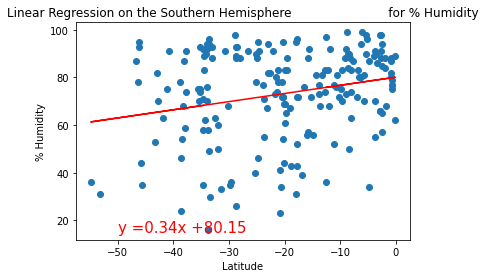

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [67]:
r_humidity_south = np.corrcoef(x_values, y_values)
r_humidity_south[0,1]

0.24080199966433435

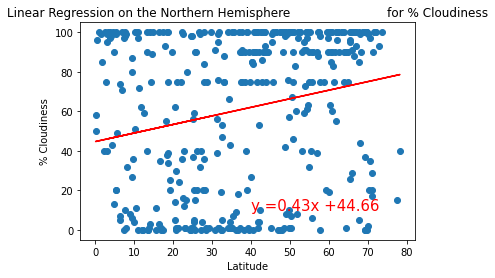

In [68]:
#Performing Lin Reg on the Percent Cloudiness for Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [69]:
#Measuring sttrength of relationship between latitude and cloudiness in northern hemisphere.
r_cloudiness_north = np.corrcoef(x_values, y_values)
r_cloudiness_north[0,1]

0.2264872208170113

In [70]:
#yeah, no real relationship as expected when I think more about the data and these two variables in particular.

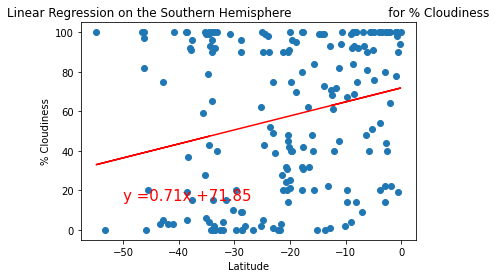

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

In [72]:
#Measuring sttrength of relationship between latitude and cloudiness in southern hemisphere.
r_cloudiness_south = np.corrcoef(x_values, y_values)
r_cloudiness_south[0,1]

0.24606023024676935

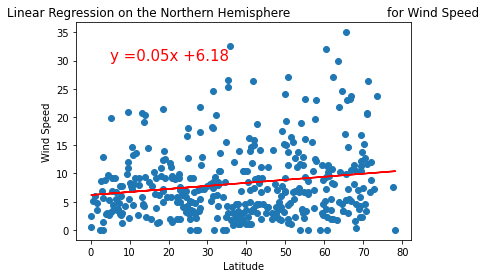

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,30))

In [76]:
#Measuring sttrength of relationship between latitude and wind speed in northern hemisphere.
r_wind_speed_north = np.corrcoef(x_values, y_values)
r_wind_speed_north[0,1]

0.17198183486099175

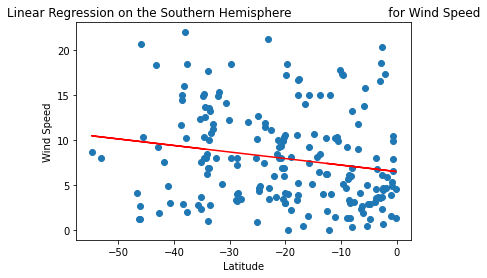

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [78]:
#Measuring sttrength of relationship between latitude and wind speed in northern hemisphere.
r_wind_speed_south = np.corrcoef(x_values, y_values)
r_wind_speed_south[0,1]

-0.18585029033949768

In [79]:
#Now Setting Up Google PLaces And Maps API

In [80]:
#Now that you have finished helping with your company's STEM project, it's time to get back to 
#working on the travel app for customers. You and Jack want this to feel like a really cool, 
#interactive experience, so you decide to create a variety of heatmaps for the weather data on the 
#website, with some interactive dropdowns for additional information. 
#You will need to write the code that uses the Google Maps and Places API that will create each heatmap

In [81]:
#Next, install the gmaps dependency in our PythonData development environment. I.e Command Prompt. 

In [82]:
# The amount of coding needed to create a heatmap is small.